In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
tqdm.pandas()


# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem definition

We were provided with a dataset containing unlabelled reviews of films. Our goal is to perceive whether these films, through their reviews, are perceived positively (1) or negatively (0). We will therefore apply a clustering algorithm, kmeans++, in order to identify the two described classes and label the reviews. This technique appears to be one of the most widely used in an Unsupervised Learning context.


In [ ]:
df_unlabel = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Sentiment_analisys/unlabeledTrainData.tsv', sep='\t', error_bad_lines=False)

Skipping line 43043: expected 2 fields, saw 3



In [ ]:
df_unlabel.head()

,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."


In [ ]:
print('Check Assenza Id duplicati')
df_unlabel.id.nunique()==len(df_unlabel)

Check Assenza Id duplicati


True

### Make tfidf matrix

In [ ]:
# Define some useful elements
lemmatizer = PorterStemmer()
stop_words = set(stopwords.words('english'))
e_words = set(nltk.corpus.words.words())

In [ ]:
# Function to clean the text
def clean_text(text):

    words = word_tokenize(text)
    good_words = []
    for word in words:
        if word.lower() not in stop_words and word.isalpha() and word.lower() in e_words:
            good_words.append(word.lower())
    return good_words

In [ ]:
# Let's apply the function to clear the text
clean_review = df_unlabel['review'].progress_apply(lambda text: clean_text(text))
df_unlabel['clean_review']=clean_review

  0%|          | 0/49998 [00:00<?, ?it/s]

In [ ]:
X = df_unlabel['clean_review'].apply( lambda x: ' '.join(x))

In [ ]:
# Let's Define tfidf Vectorizer and create the Matrix with words values
tv = TfidfVectorizer(ngram_range = (2,2), # we choose only bigrams
                    sublinear_tf = True,
                    max_features = 2000)

In [ ]:
# Let's do word embeddings transformation
tfidf_matrix = tv.fit_transform(X)
tfidf_matrix = tfidf_matrix.toarray()
print('Train Matrix td-idf: ',tfidf_matrix.shape)

Train Matrix td-idf:  (49998, 2000)


# Clustering with K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfTransformer


# Normalize the TF-IDF matrix
tfidf_matrix_normalized = TfidfTransformer().fit_transform(tfidf_matrix)

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix_normalized)

# Now, cluster_labels contains the cluster assignments for each data point

# You can also get the cluster centers if needed
cluster_centers = kmeans.cluster_centers_

print("K-Means clustering with 2 clusters is complete.")

K-Means clustering with 2 clusters is complete.


In [ ]:
df_unlabel['lebels'] = cluster_labels

In [ ]:
df_unlabel.head(10)

,id,review,clean_review,lebels
0,9999_0,"Watching Time Chasers, it obvious that it was ...","[watching, time, obvious, made, bunch, maybe, ...",0
1,45057_0,I saw this film about 20 years ago and remembe...,"[saw, film, ago, remember, particularly, nasty...",0
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba...","[minor, new, york, barnard, informed, husband,...",1
3,7161_0,I went to see this film with a great deal of e...,"[went, see, film, great, deal, excitement, sch...",0
4,43971_0,"Yes, I agree with everyone on this site this m...","[yes, agree, everyone, site, movie, bad, even,...",0
5,36495_0,Jennifer Ehle was sparkling in \Pride and Prej...,"[sparkling, simply, wonderful, caliber, film, ...",0
6,49472_0,Amy Poehler is a terrific comedian on Saturday...,"[amy, terrific, comedian, night, live, role, m...",1
7,36693_0,A plane carrying employees of a large biotech ...,"[plane, carrying, large, firm, daughter, goes,...",0
8,316_0,"A well made, gritty science fiction movie, it ...","[well, made, gritty, science, fiction, movie, ...",0
9,32454_0,Incredibly dumb and utterly predictable story ...,"[incredibly, dumb, utterly, predictable, story...",0


<Axes: >

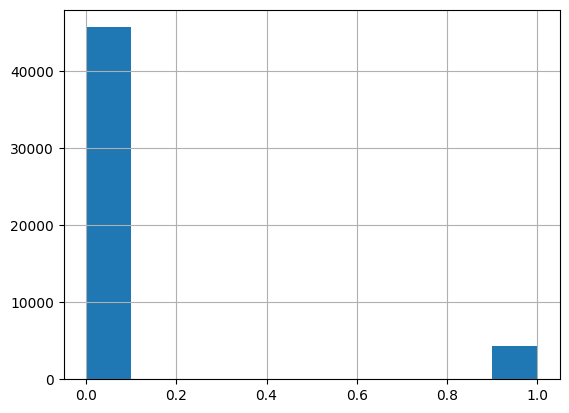

In [ ]:
df_unlabel['lebels'].hist()

Apparently most of the films in this dataset that were initially without labels turn out to be negatively reviewed.